## **Introdutory Summary**

The page outlines a Python-based data mining project designed to extract job post information from PDF circulars published by the Department of Public Service and Administration (DPSA) in South Africa.



The project aims to automate the extraction of job vacancies from these circulars, which are typically published more than once a month. The extracted data includes details such as the post title, salary level, department, and closing date for applications.

## **Problem Statement**

The **Department of Public Service and Administration (DPSA)** publishes most of its job vacancies on  [**www.dpsa.gov.za**](https://https://www.dpsa.gov.za/) in the form of a lengthy and unstructured PDF document on a monthly basis. This format is not user-friendly, especially considering the high youth unemployment rate in South Africa.

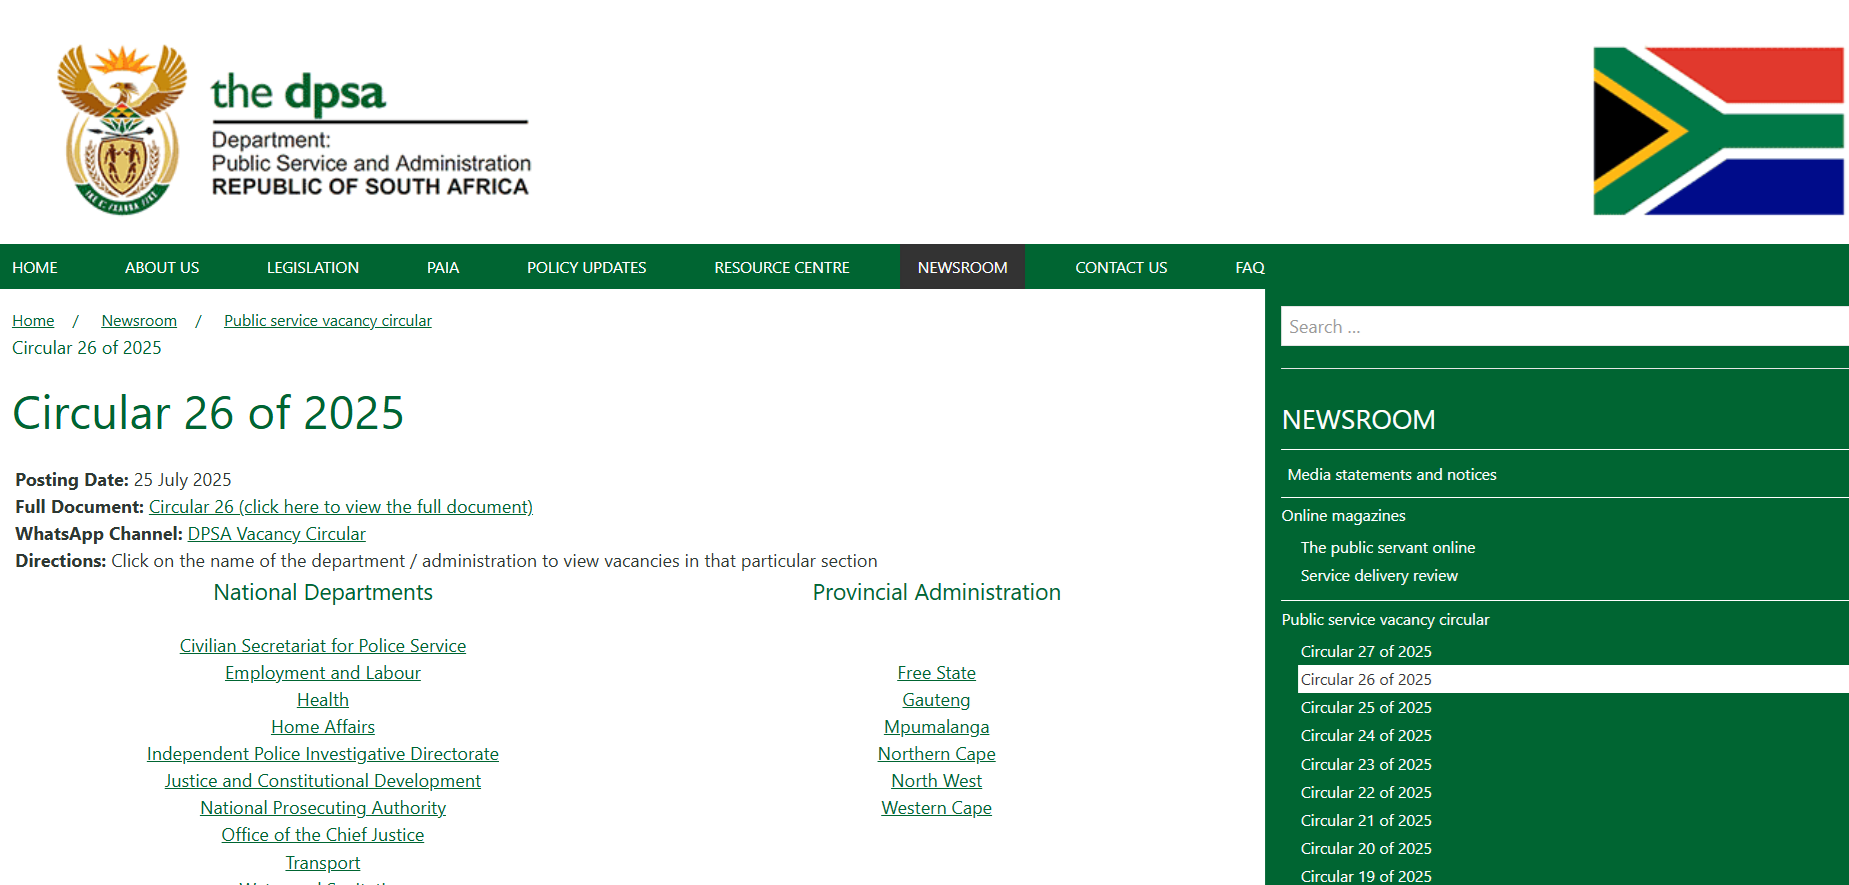

In [4]:
from PIL import Image
Image.open(r"C:\data_repo\DPSA Circular data mining\DPSA_Landing_Page.png")

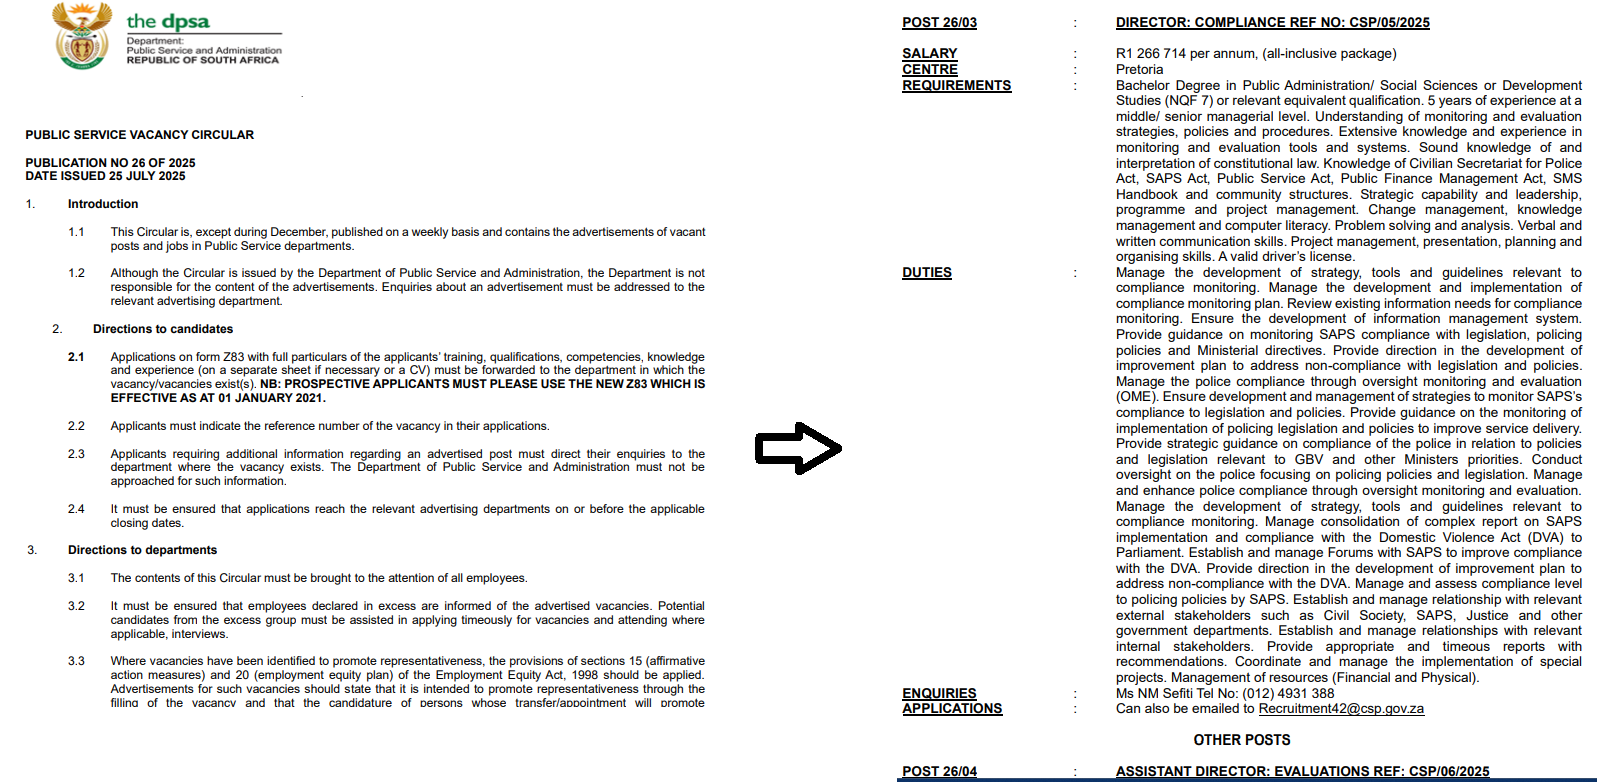

In [5]:
Image.open(r"C:\data_repo\DPSA Circular data mining\pdf_Vcancies.png")

When scrolling through the job listings, it would be more effective and accessible if the vacancies were presented in a structured table format, similar to other job portals. The current format — a long, text-heavy document — makes it difficult for users to quickly find relevant opportunities.

# **Methodology & Results**

This python script works with all pdfs published on [Department of public service](https://https://www.dpsa.gov.za/newsroom/psvc/) to convert it into a structured table format. The script uses the PyMuPDF library to read the PDF, extract text, and identify job postings based on specific patterns in the text. It then organizes this information into a pandas DataFrame for easy manipulation and analysis.

- **PDF Handling**: The script uses the PyMuPDF library (`fitz`) to open and read text from a DPSA PDF job circular stored on Google Drive.
- **Text Extraction & Splitting**: It processes the entire PDF, splits it by job post identifiers, and extracts structured information using regular expressions.
- **Captured Fields**:
  - Post title
  - Centre (location)
  - Salary
  - Requirements
  - Duties
  - Enquiries contact
  - Closing date (extracted from the full document or per post)
- **Output**: The collected data for each post is stored in a pandas DataFrame and can be saved or analyzed further.
- **Result**: The script reports a total of **313 job positions** extracted from the circular.

In [6]:
pip install PyMuPDF

Note: you may need to restart the kernel to use updated packages.


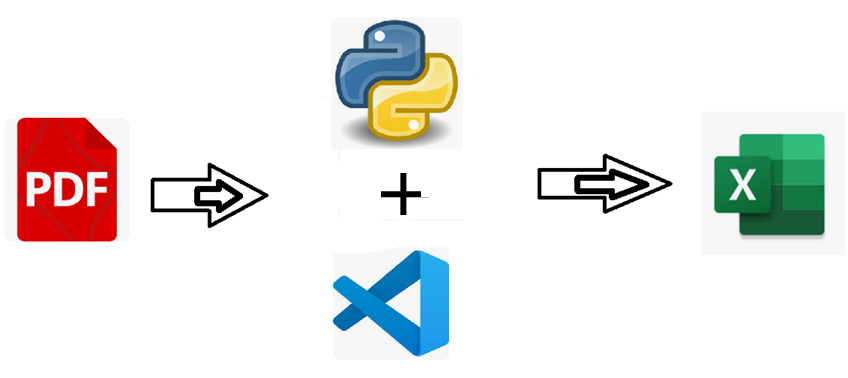

In [7]:
#Import necessary libraries
import os
import fitz  # PyMuPDF
import re
import pandas as pd


# Define the function to extract job postings from DPSA PDF circulars
# This function reads a PDF file, extracts job postings, and returns them in a structured format    

def extract_dpsa_jobs(pdf_path):
    """
    Extract job postings from DPSA PDF circulars.
    
    Args:
        pdf_path (str): Path to the PDF file
        
    Returns:
        pandas.DataFrame: DataFrame containing extracted job information
    """
    try:
        # Open the PDF
        doc = fitz.open(pdf_path)
        
        # Extract all text
        text = ""
        for page in doc:
            text += page.get_text()
        
        # Close the document
        doc.close()
        
        # Split text by each post
        posts = re.split(r"\nPOST\s+\d+/\d+\s*:\s*", text)[1:]  # skip header
        
        data = []
        for post_text in posts:
            try:
                # Extract fields using regex patterns
                post_match = re.search(r"^(.*?)\n", post_text)
                centre_match = re.search(r"CENTRE\s*:\s*(.*)", post_text)
                salary_match = re.search(r"SALARY\s*:\s*(.*)", post_text)
                requirements_match = re.search(r"REQUIREMENTS\s*:\s*(.*?)(?:DUTIES\s*:)", post_text, re.DOTALL)
                duties_match = re.search(r"DUTIES\s*:\s*(.*?)(?:ENQUIRIES\s*:)", post_text, re.DOTALL)
                enquiries_match = re.search(r"ENQUIRIES\s*:\s*(.*)", post_text)
                closing_match = re.search(r"CLOSING DATE\s*:\s*(.*)", text)

                post = post_match.group(1).strip() if post_match else ""
                centre = centre_match.group(1).strip() if centre_match else ""
                salary = salary_match.group(1).strip() if salary_match else ""
                requirements = requirements_match.group(1).strip().replace("\n", " ") if requirements_match else ""
                duties = duties_match.group(1).strip().replace("\n", " ") if duties_match else ""
                enquiries = enquiries_match.group(1).strip() if enquiries_match else ""
                closing_date = closing_match.group(1).strip() if closing_match else ""

                data.append({
                    "Post": post,
                    "Centre": centre,
                    "Salary": salary,
                    "Requirements": requirements,
                    "Duties": duties,
                    "Enquiries": enquiries,
                    "Closing Date": closing_date
                })
            except Exception as e:
                print(f"Error processing a post: {e}")
                continue
                
        return pd.DataFrame(data)
        
    except fitz.FileNotFoundError:
        print(f"Error: PDF file not found at {pdf_path}")
        return pd.DataFrame()
    except Exception as e:
        print(f"Error processing PDF: {e}")
        return pd.DataFrame()

# Display an image (if needed)  
Image.open(r"C:\data_repo\DPSA Circular data mining\WORKFLOW.bmp")

In [10]:
# Example usage:
df = extract_dpsa_jobs(r"C:\data_repo\DPSA Circular data mining\Source_Data\PSV_CIRCULAR_25_OF_2025.pdf")
print(f"Total unique entries: {len(df)}")

Total unique entries: 154


In [14]:
df.to_excel(r"C:\data_repo\DPSA Circular data mining\Output\PSV_CIRCULAR_25_OF_2025.xlsx", index=False)
print("Data saved successfully!")
df  # Display the first few rows of the DataFrame

Data saved successfully!


,Post,Centre,Salary,Requirements,Duties,Enquiries,Closing Date
0,DEPUTY DIRECTOR: LABOUR CENTRE OPERATIONS REF NO:,Labour Centre: Knysna (Western Cape),"R1 059 105 per annum, (all inclusive)",Three (3) years National Diploma (NQF6)/ Under...,Manage the service delivery objectives as per ...,Mr. Q Bowman Tel No: (021) 441 8120,01 August 2025 at 16:00 (walk-in) and 00:00 (o...
1,ASSISTANT DIRECTOR: SUPPLY CHAIN MANAGEMENT RE...,Provincial Office: Kimberley,R468 459 per annum,Three (3) years’ National Diploma (NQF 6)/ Und...,Manage demand of goods and services in the Pro...,Ms M Mogongoa Tel No: (053) 8381610,01 August 2025 at 16:00 (walk-in) and 00:00 (o...
2,ASSISTANT DIRECTOR: COMMUNICATIONS REF NO: HR4...,Provincial Office: Western Cape,R468 459 per annum,Three (3) year National Diploma (NQF6)/ Underg...,Provide public relations and media liaison ser...,Mr. Q Bowman Tel No: (021) 441 8120,01 August 2025 at 16:00 (walk-in) and 00:00 (o...
3,ASSISTANT DIRECTOR: LABOUR MARKET INFORMATION ...,Provincial Office: Western Cape,R468 459 per annum,Three (3) year National Diploma (NQF6)/ Underg...,Manage performance information of the province...,Mr. Q Bowman Tel No: (021) 441 8120,01 August 2025 at 16:00 (walk-in) and 00:00 (o...
4,ASSISTANT,Provincial Office: Western Cape,R468 459 per annum,Three (3) year qualifications National Diploma...,Implement Fraud detections and Anti-Corruption...,Mr. Q Bowman Tel No: (021) 441 8120,01 August 2025 at 16:00 (walk-in) and 00:00 (o...
...,...,...,...,...,...,...,...
149,STERILISATION PRODUCTION OPERATOR (5/8 POSTS),Caledon Hospital,R102 300 per annum,Minimum educational qualification: General Edu...,Collect and deliver soiled and clean linen and...,Mr S Roman Tel No: (028) 212 1071,01 August 2025 at 16:00 (walk-in) and 00:00 (o...
150,SESSIONAL MEDICAL SPECIALIST GRADE 1 TO 3 (URO...,New Somerset Hospital,Grade 1: R612 per hour,Minimum educational qualification: Appropriate...,Provision of clinical service delivery at spec...,Prof H Bougard Tel No: (021) 402-6444,01 August 2025 at 16:00 (walk-in) and 00:00 (o...
151,MEDICAL OFFICER GRADE 1 TO 3 (35 SESSIONS) NHI,Vredenburg Hospital,Grade 1: R482 per hour,Minimum educational qualification: Appropriate...,Clinical service provision. Forensic service p...,Dr TV Zimri Tel No: (022) 709-7208,01 August 2025 at 16:00 (walk-in) and 00:00 (o...
152,MEDICAL OFFICER SESSIONAL (14 HOURS PER WEEK) ...,Northern/Tygerberg Substructure,Grade 1: R482 per hour,Minimum educational qualification: Appropriate...,Provide quality outpatient care to patients in...,Mr. AE Patientia Tel No: (021) 815-8895,01 August 2025 at 16:00 (walk-in) and 00:00 (o...


# **Conclusion** 

This is an image from a page of the DPSA circular, showing how the job vacancies are presented in a structured format.

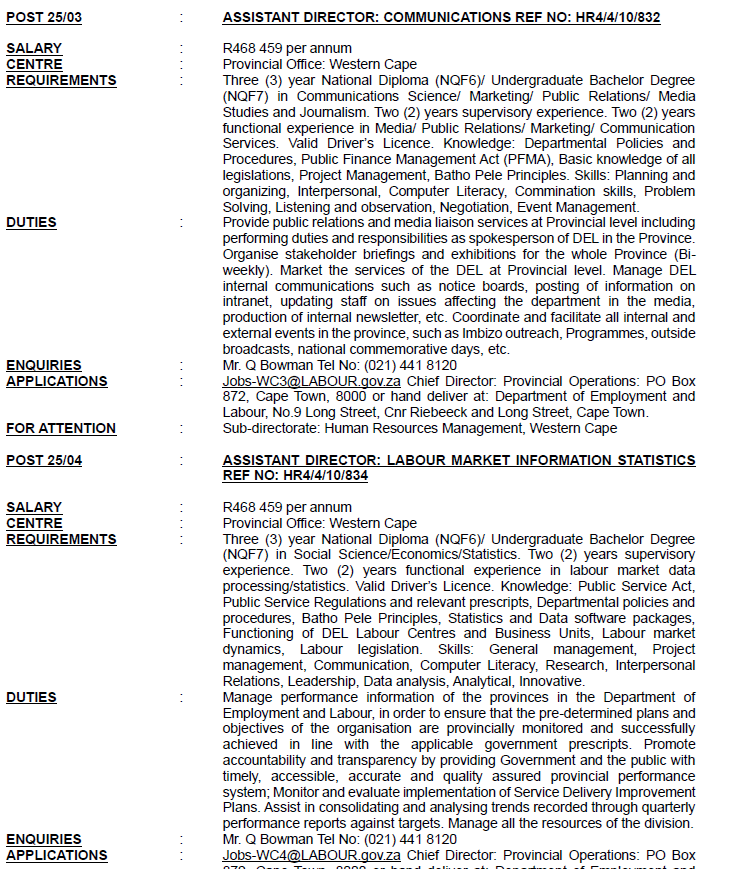

In [15]:
Image.open(r"C:\data_repo\DPSA Circular data mining\Vaccancy.png")

After running the script, the extracted job data is saved to an Excel file for further analysis or sharing. The structured format allows for easier access and understanding of available job opportunities, addressing the initial problem of PDF documents.

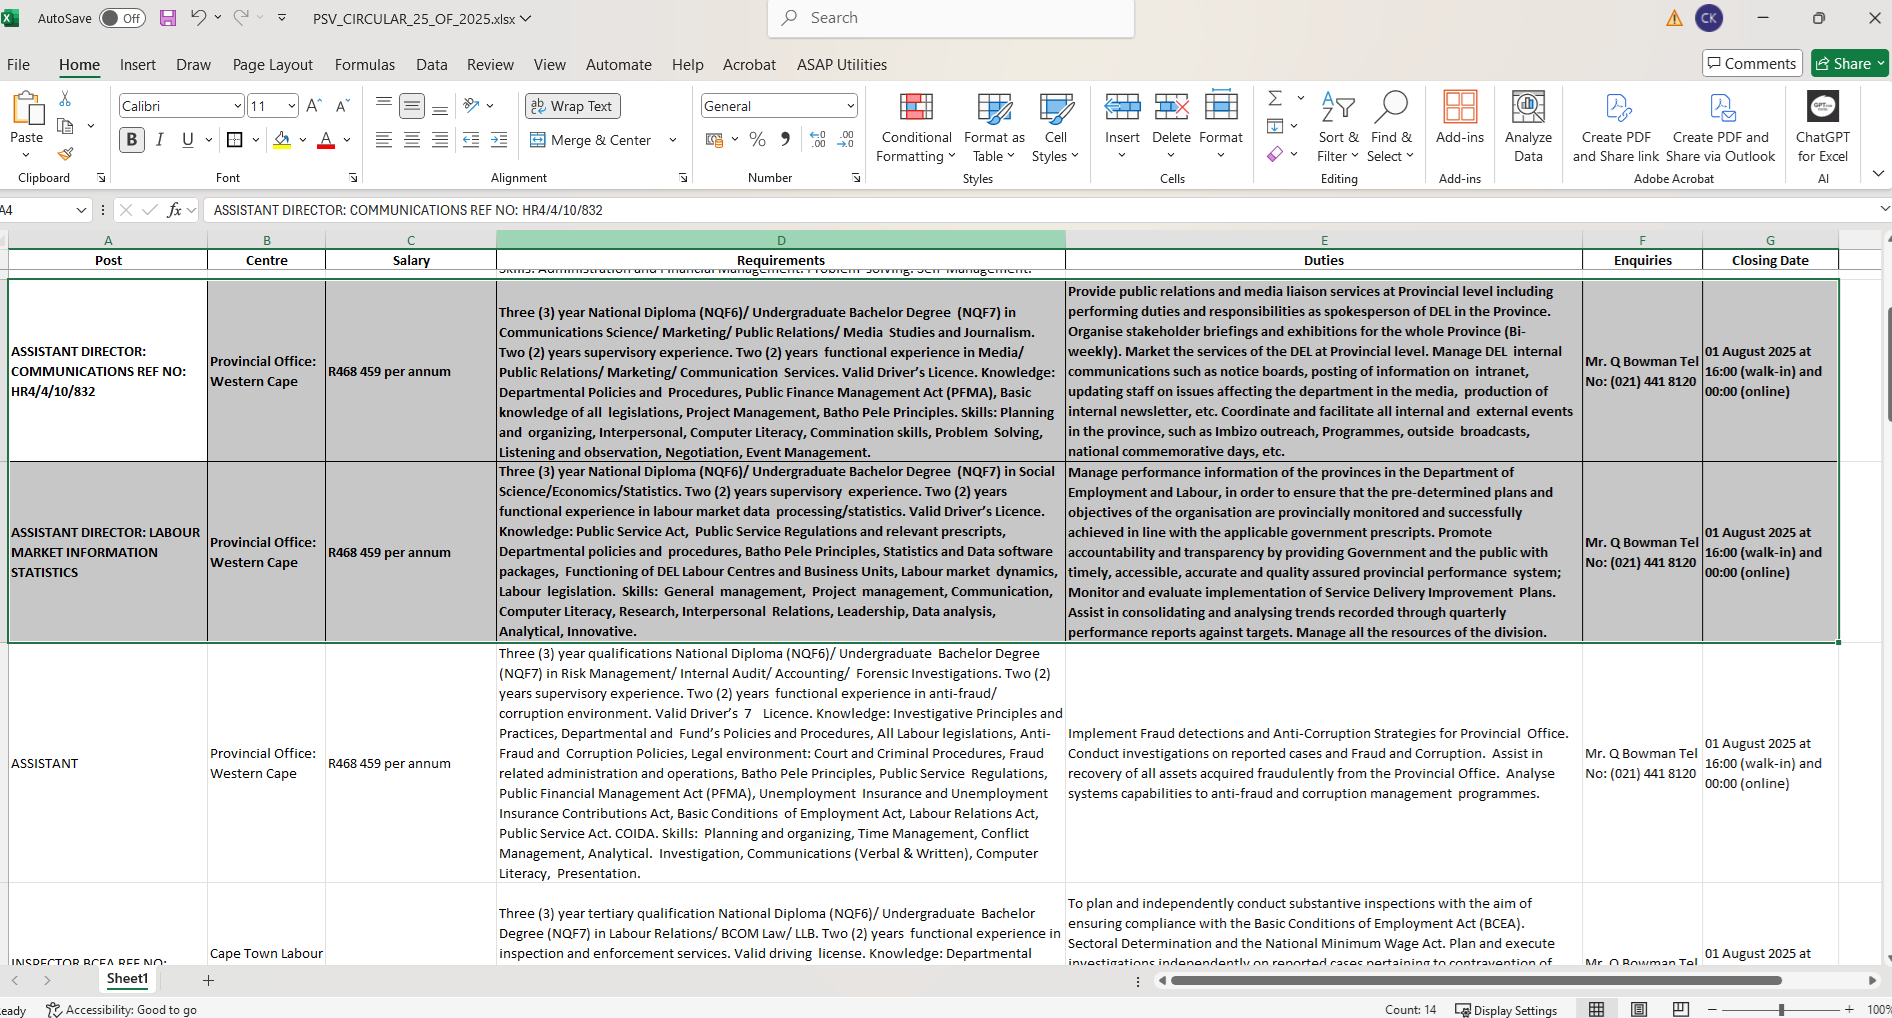

In [16]:
Image.open(r"C:\data_repo\DPSA Circular data mining\excel output.png")

# **Reference**
**Feel free to connect with Conrad Katlego Mogane on:**
-[GitHub]( https://github.com/ConradKatlegoMogane) , [LinkedIn](https://www.linkedin.com/in/conrad-mogane-55a8947b/) Happy coding!**